In [105]:
import numpy as np
from astropy.time import Time
import astropy.units as u
from astropy.coordinates import solar_system_ephemeris, EarthLocation, get_icrs_coordinates, AltAz
from astropy.coordinates import get_body_barycentric, get_body, get_moon
# t = Time.now()
t = Time('2020-09-19 16:00')
delta_times = np.linspace(0, 5, num=200) * u.hr
times = t + delta_times
loc = EarthLocation.of_address('Pordenone, Italy')

from datetime import datetime
from astropy.time import TimezoneInfo
utc_plus_two_hours = TimezoneInfo(utc_offset=2*u.hour)

In [106]:
from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)
%matplotlib inline

In [107]:
mizar = get_icrs_coordinates('Mizar')
alcor = get_icrs_coordinates('Alcor')
aa = AltAz(location=loc, obstime=t)
mizar.transform_to(aa)

<SkyCoord (AltAz: obstime=2020-09-19 16:00:00.000, location=(4333831.2033362, 973470.0255359, 4561868.2083341) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (304.43861991, 57.38525428)>

In [108]:
mizar.separation(alcor)

<Angle 0.19682972 deg>

In [109]:
aa = AltAz(location=loc, obstime=times)

In [110]:
with solar_system_ephemeris.set('builtin'):
    jupiter = get_body('jupiter', times, loc) 
aa_coordinates_jupiter = jupiter.transform_to(aa)
aa_coordinates_jupiter.secz

<Quantity [4.30433781, 4.25753896, 4.21214229, 4.16809266, 4.12533789,
           4.08382856, 4.04351779, 4.00436114, 3.96631642, 3.92934354,
           3.89340442, 3.85846285, 3.82448436, 3.79143614, 3.75928695,
           3.728007  , 3.69756789, 3.66794253, 3.63910507, 3.6110308 ,
           3.58369615, 3.55707857, 3.5311565 , 3.50590932, 3.4813173 ,
           3.45736155, 3.43402398, 3.41128727, 3.3891348 , 3.36755065,
           3.34651957, 3.32602689, 3.30605858, 3.28660113, 3.26764161,
           3.24916758, 3.23116709, 3.21362867, 3.19654128, 3.17989433,
           3.16367763, 3.14788138, 3.13249615, 3.11751288, 3.10292285,
           3.08871767, 3.07488927, 3.06142989, 3.04833204, 3.03558854,
           3.02319246, 3.01113714, 2.99941616, 2.98802336, 2.97695279,
           2.96619874, 2.9557557 , 2.94561839, 2.93578171, 2.92624078,
           2.91699087, 2.90802746, 2.89934621, 2.89094293, 2.8828136 ,
           2.87495438, 2.86736155, 2.86003157, 2.85296104, 2.8461467 ,
      

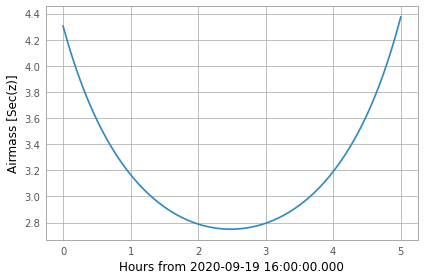

In [111]:
plt.plot(delta_times, aa_coordinates_jupiter.secz)
plt.xlabel(f'Hours from {t}')
plt.ylabel('Airmass [Sec(z)]')
plt.tight_layout()

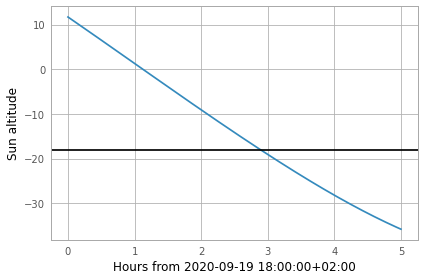

In [115]:
from astropy.coordinates import get_sun

sun_coords = get_sun(times).transform_to(aa)
plt.plot(delta_times, sun_coords.alt.deg)
plt.axhline(-18, color='k')
plt.xlabel(f'Hours from {t.to_datetime(timezone=utc_plus_two_hours)}')
plt.ylabel('Sun altitude')
plt.tight_layout()

In [117]:
# when exactly is -18 degree twilight?
from astropy.coordinates import get_sun
from scipy.optimize import fsolve

def find_twilight(t0, loc=loc, thr = 18):
    def alt(deltat):
        t = t0 + deltat*u.hr
        sun_coords = get_sun(t).transform_to(AltAz(location=loc, obstime=t))
        return(sun_coords.alt.deg + thr)
    deltat_correct = fsolve(alt, 0)
    return(t0 + deltat_correct*u.hr)

In [118]:
print(find_twilight(t).to_datetime(timezone=utc_plus_two_hours))

[datetime.datetime(2020, 9, 19, 20, 53, 27, 46039, tzinfo=<astropy.time.formats.TimezoneInfo object at 0x7f6b967597f0>)]


GeodeticLocation(lon=<Longitude 12.6597197 deg>, lat=<Latitude 45.9562503 deg>, height=<Quantity -1.37567378e-09 m>)